# Philadelphia Crime Project
## CMSC320 Final Tutorial
### _Prit Patel, Ali Nili, Ali Atai_ 



# Introduction 
This project is about Crime in Philadelphia

# Part - 1: Data Collection and Processing

In [1]:
!pip install folium
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt
import sklearn as skl
from sklearn import linear_model
import os
from folium import IFrame
from folium.plugins import MarkerCluster
import seaborn as sb
import matplotlib.dates as mdates
import datetime

import warnings
warnings.filterwarnings("ignore")

## Data Collection
This data is collected from Kaggle, https://www.kaggle.com/mchirico/philadelphiacrimedata. The data is in a CSV format in a 
file named crime.csv. After that it is loaded into a pandas dataframe to further process and visualize the data. 

This data contains information about crime in Philadephia from 2005 to 2017.  

In [2]:
# Date Parser for the data
dateparse = lambda d: datetime.datetime.strptime(d,'%Y-%m-%d %H:%M:%S')

# Load the data into a dataframe.
df = pd.read_csv("crime.csv",
  header=0,names=['Dc_Dist', 'Psa', 'Dispatch_Date_Time', 'Dispatch_Date',
       'Dispatch_Time', 'Hour', 'Dc_Key', 'Location_Block', 'UCR_General',
       'Crime_Type',  'Police_Districts', 'Month', 'Longitude',
       'Latitude'],dtype={'Dc_Dist':str,'Psa':str,
                'Dispatch_Date_Time':str,'Dispatch_Date':str,'Dispatch_Time':str,
                  'Hour':str,'Dc_Key':str,'Location_Block':str,
                     'UCR_General':str,'Crime_Type':str,
              'Police_Districts':str,'Month':str,'Longitude':str,'Latitude':str},
             parse_dates=['Dispatch_Date_Time'],date_parser=dateparse)

# Fix Month to datetime Month
df['Month'] = df['Month'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m'))
df.head()

Dc_Dist Psa  Dispatch_Date_Time Dispatch_Date Dispatch_Time Hour  \
0      18   3 2009-10-02 14:24:00    2009-10-02      14:24:00   14   
1      14   1 2009-05-10 00:55:00    2009-05-10      00:55:00    0   
2      25   J 2009-08-07 15:40:00    2009-08-07      15:40:00   15   
3      35   D 2009-07-19 01:09:00    2009-07-19      01:09:00    1   
4      09   R 2009-06-25 00:14:00    2009-06-25      00:14:00    0   

         Dc_Key            Location_Block UCR_General          Crime_Type  \
0  200918067518  S 38TH ST  / MARKETUT ST         800      Other Assaults   
1  200914033994          8500 BLOCK MITCH        2600  All Other Offenses   
2  200925083199               6TH CAMBRIA         800      Other Assaults   
3  200935061008       5500 BLOCK N 5TH ST        1500   Weapon Violations   
4  200909030511       1800 BLOCK WYLIE ST        2600  All Other Offenses   

  Police_Districts      Month   Longitude   Latitude  
0              NaN 2009-10-01         NaN        NaN  
1              NaN 2009-05-01         NaN        NaN  
2              NaN 2009-08-01         NaN        NaN  
3               20 2009-07-01  -75.130477  40.036389  
4                8 2009-06-01   -75.16635  39.969532

### Tidying the data
Remove all unnecessary columns from the table and tidy any other column that needs tidying. 

In [3]:
# First drop Location_Block, Dc_Key, Dc_Dist, Dispatch_Date_Time and Hour columns
df = df.drop('Location_Block', axis=1)
df = df.drop('Dc_Key', axis=1)
df = df.drop('Dc_Dist', axis=1)
df = df.drop('Dispatch_Date_Time', axis=1)
df = df.drop('Hour', axis=1)

# Then add two columns for Month and Year and change the name of the exisitng Month column to Crime_Date
df["Year"] = pd.DatetimeIndex(df["Month"]).year
df["Day"] = pd.DatetimeIndex(df["Dispatch_Date"]).day
df["Crime_Date"] = df["Month"]
df["Month"] = pd.DatetimeIndex(df["Crime_Date"]).month


# Here since this dataset is very large, dropping all NaN values would clean it without causing any bias
df2 = df.dropna()
df2 = df2[df2.Year != 2017]
df2.index = range(len(df2.index))
df2.head()

Psa Dispatch_Date Dispatch_Time UCR_General          Crime_Type  \
0   D    2009-07-19      01:09:00        1500   Weapon Violations   
1   R    2009-06-25      00:14:00        2600  All Other Offenses   
2   1    2015-04-25      12:50:00         600              Thefts   
3   K    2009-02-10      14:33:00         800      Other Assaults   
4   3    2015-10-06      18:18:00         600              Thefts   

  Police_Districts  Month   Longitude   Latitude  Year  Day Crime_Date  
0               20      7  -75.130477  40.036389  2009   19 2009-07-01  
1                8      6   -75.16635  39.969532  2009   25 2009-06-01  
2               13      4  -75.166412   39.94007  2015   25 2015-04-01  
3               16      2  -75.171149  39.979586  2009   10 2009-02-01  
4               16     10  -75.160229  39.976134  2015    6 2015-10-01

# Part - 2: Data Visualization and Exploratory Analysis

At this point, the data is clean and ready for analsis. This part includes visualization of the data based on different 
factors like year, month, crime type. It also includes a map to better visualize crime in Philadephia. In the end it 
has statistical measurements to understand how the parameters vary. 

### Number of Crimes Commited per Year in Philadelphia
A Plot of total number of crimes commited in a given Month from 2006 to 2017.

Here as you can see in the graph below, the total number of crimes in Philadelphia seem to be decreasing with years.

Text(0.5, 1, 'Number of Crimes commited per year')

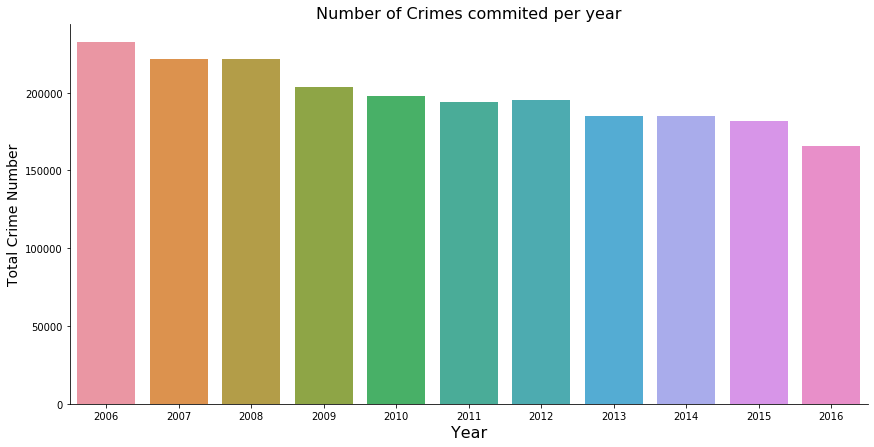

In [4]:
sb.catplot(x="Year", kind="count", height=6, aspect=2, data=df2)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Total Crime Number", fontsize=14)
plt.title("Number of Crimes commited per year", fontsize=16)

### Number of Crimes Commited per Month in Philadelphia
A Plot of total number of crimes commited in a given Month from 2006 to 2017.
Here as you can see, the trend in crimes per Month doesn't look linear like the previous (Year) graph. Here it seems 
like more crimes happen in the middle of the year, compared to the start and end. 

Text(0.5, 1, 'Number of Crimes commited per Month')

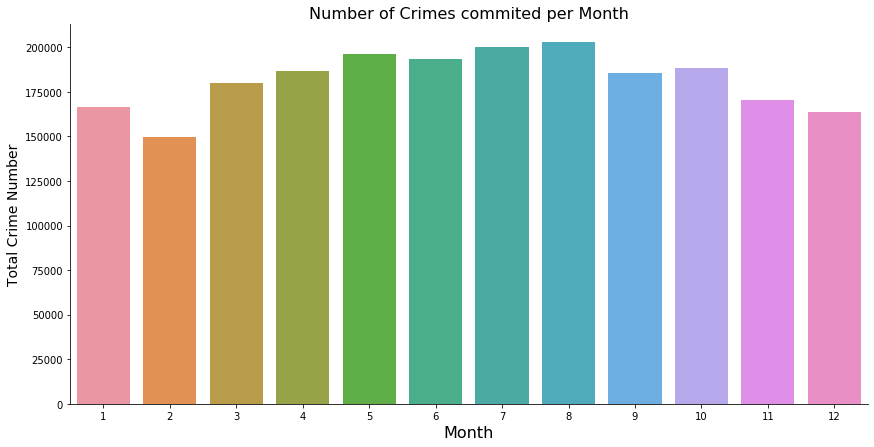

In [5]:
sb.catplot(x='Month', kind='count', height=6, aspect=2, data=df2)

plt.xlabel("Month", fontsize=16)
plt.ylabel("Total Crime Number", fontsize=14)
plt.title("Number of Crimes commited per Month", fontsize=16)

### Visualization of Crime by different types
There are 33 different types of Crimes and the following graph visualized the frequency of each of that type to better
understand how crime rates in Philadelphia are changing based on different types. 

Here it can be seen that the number of thefts, vandalism, drug violations, frauds and burglaries are higher than 
the number of Arsons, Rapes, Criminal Homicides, Public Drukenness and Embezzlements. 

Text(0.5, 1, 'Number of Times a Specific type of Crime was Commited')

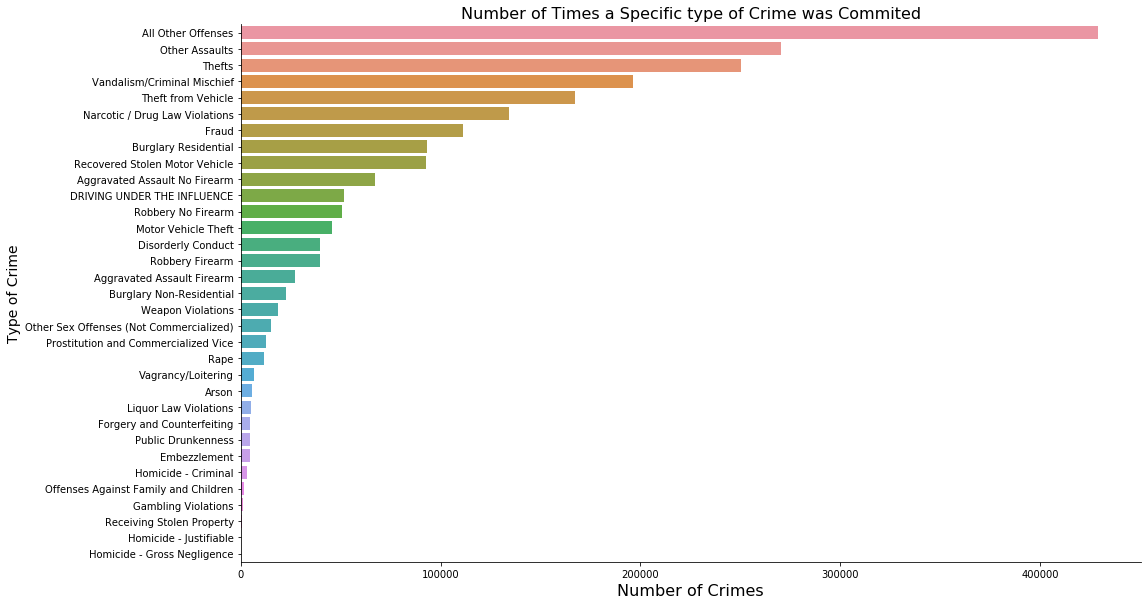

In [6]:
sb.catplot(y='Crime_Type', kind ='count', height=8, aspect=2, order=df2.Crime_Type.value_counts().index,
           data=df2)

plt.xlabel("Number of Crimes", fontsize=16)
plt.ylabel("Type of Crime", fontsize=14)
plt.title("Number of Times a Specific type of Crime was Commited", fontsize=16)

### Number of Crimes per Police District in Philadelphia
This graph shows the number of crimes per Police District in Philadelphia, it is ordered by the crime count. 

From the graph below it can be seen that the number of crimes commited per police district has a lot of disparities, 
with district 11 having the highest number and district 22 having the smallest number

Text(0.5, 1, 'Number of Crimes commited per Police District')

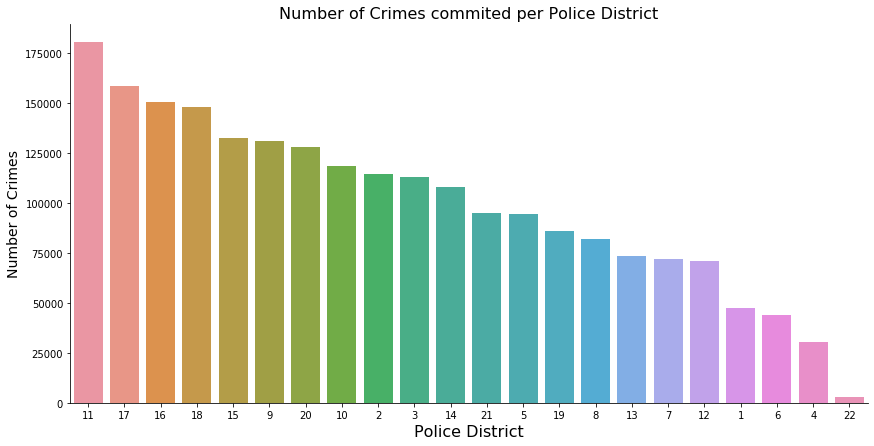

In [21]:
sb.catplot(x='Police_Districts', kind='count', height=6, aspect=2, order=df2.Police_Districts.value_counts().index, 
           data=df2)

plt.xlabel("Police District", fontsize=16)
plt.ylabel("Number of Crimes", fontsize=14)
plt.title("Number of Crimes commited per Police District", fontsize=16)

### Number of Crimes commited on each day of the Year in Philadelphia
This next plot groups data by Month AND Day, which means that it shows average number of crime commited on a given day in 
a year. Using this graph it can be seen if there any specific days in year when crime is too high or too low?

From the below graph it can be seen that the number of Crimes in Philadelphia are surprisingly low on Holidays like Valentine's Day, Independence Day, Thanksgiving week (Since Thanksgiving doesn't have a specific date, the average of that entire week is low) and Christmas.

Text(305, 218, 'Christmas')

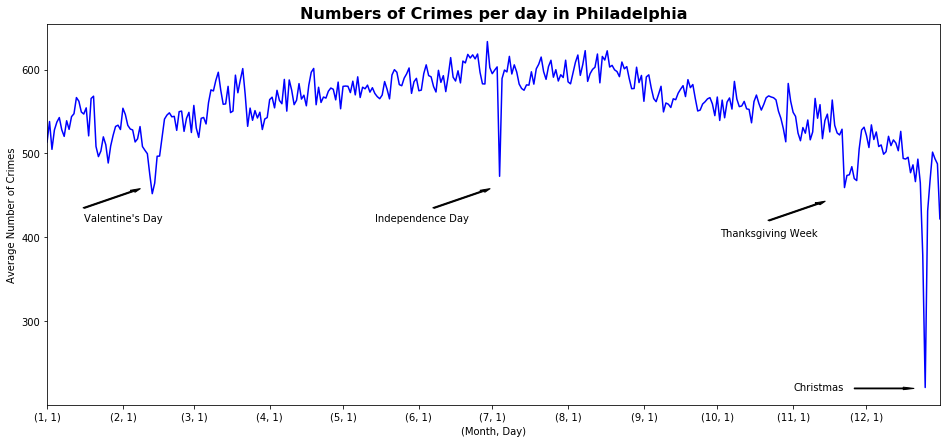

In [8]:
# Get average number of crime commited on each day of the Year for each 365 days
data_by_day_and_month = df.groupby(["Month", "Day"]).size() / 11

# Since only 3 crimes have occured on February 29th, divide it by 3
data_by_day_and_month[2][29] = (data_by_day_and_month[2][29] * 11) / 3

# Make sure that the xticks in the following graph are always on the first of the month
leap_year = [31,29,31,30,31,30,31,31,30,31,30,31]
ticks = []
n = 0
for days in leap_year:
    ticks.append(n)
    n += days

plot = data_by_day_and_month.plot(figsize=(16,7), xticks=ticks, color="blue")
plot.set(xlabel="(Month, Day)", ylabel="Average Number of Crimes")
plot.set_title("Numbers of Crimes per day in Philadelphia", fontweight="bold", fontsize=16)

# Valentine's Day
plt.arrow(15,435,20,20, width=1, color="black", head_starts_at_zero=False)
plt.text(15,420, "Valentine's Day")

# Independence Day
plt.arrow(158,435,20,20, width=1, color="black", head_starts_at_zero=False)
plt.text(134,420, "Independence Day")

# Thanksgiving
plt.arrow(295,420,20,20, width=1, color="black", head_starts_at_zero=False)
plt.text(275,402, "Thanksgiving Week")

# Christmas
plt.arrow(330,220,20,0, width=1, color="black", head_starts_at_zero=False)
plt.text(305,218, "Christmas")


## Visualization using the Map of Philadelphia
This section uses the map of philadelphia to show the trends in Crime Data in Philadelphia for a better understanding of where in the city are most of the crimes concentrated. 

We have included three maps: 
1. This one shows all crimes in 2016, which helps see which regions are safe / unsafe.
2. This one shows heatmap of dangerous crimes from 2011 to 2016, which shows where most dangerous crimes are concentrated.
3. This one shows heatmap of thefts from 2015 to 2016, which shows where most thefts occur.

Note that the reason for using different years is mainly because folium maps don't fetch for a dataset larger than a certain number

### Visualization of all crimes in 2016
This map below shows the heatmap of crimes that happened in 2016. Here the Black color represents dangerous crimes, blue color represents thefts and cyan color represents other smaller crimes. 

It is evident (just as expected) that number of dangerous crimes is less than thefts which is less than small crimes.

This graph uses a random sample of size 42,000 because for values higher than that the map doesn't render and using a random sample takes care of any bias that might occur when using a sample of the population.

In [9]:
from folium.plugins import HeatMap
from folium import plugins
from folium import FeatureGroup
from folium import IFrame
from folium.plugins import MarkerCluster
from random import randint

dangerous = ['Weapon Violations', 'Robbery Firearm', 'Homicide - Criminal', 'Aggravated Assault Firearm', 
             'Homicide - Gross Negligence', 'Homicide - Justifiable', 'Rape']

theft = ['Thefts', 'Theft from Vehicle', 'Motor Vehicle Theft', 'Receiving Stolen Property', 
         'Recovered Stolen Motor Vehicle']

map_osm = folium.Map(location=[39.95,-75.16], zoom_start=11)
arrest_loc = FeatureGroup(name="Crime")

temp_data = df2.sample(n=42000)[df2.Year == 2016]

for i,row in temp_data.iterrows():
    if row['Crime_Type'] in dangerous:
        arrest_loc.add_child(folium.Circle(radius=30, location=[row['Latitude'],row['Longitude']],color='black',fill=True))
    elif row['Crime_Type'] in theft:
        arrest_loc.add_child(folium.Circle(radius=30, location=[row['Latitude'],row['Longitude']],color='blue',fill=True))
    else:
        arrest_loc.add_child(folium.Circle(radius=30, location=[row['Latitude'],row['Longitude']],color='cyan',fill=True))
    
map_osm.add_child(arrest_loc)
map_osm.add_child(folium.map.LayerControl())
map_osm

### Visualization of "Violent" Crimes in the from 2011 - 2016
This graph visualizes a heat map of the Violent crimes commited between 2011 and 2016 included. Here violent crimes
include Weapon Violations, Robbery Firearm, Homicides, Aggravated Assaults and Rapes.

This graph shows where dangerous crimes happen most often

We have restricted the years from 2011 to 2016 because a large dataset causes problems with the Map.

In [10]:
map_osm2 = folium.Map(location=[39.95,-75.16], zoom_start=11)

# creating a new dataframe with all the dangerous crimes in it
dangerous_data = df2[df2['Crime_Type'].isin(dangerous)]

# Add data for heatmp 
data_heatmap = dangerous_data[dangerous_data.Year > 2010]
data_heatmap = data_heatmap[['Latitude','Longitude']]
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(map_osm2)

map_osm2

### Visualization of "Thefts" Crimes in the from 2015 - 2016
This graph visualizes a heat map of the thefts commited between 2011 and 2016 included. Here thefts include Thefts, Theft from Vehicle, Motor Vehicle Theft, Receiving Stolen Property, Recovered Stolen Motor Vehicle.

This graph shows where thefts crimes happen most often

We have restricted the years from 2015 to 2016 because a large dataset causes problems with fetching the Map. But the sample here is large enough to give us a good idea of the actual data.

In [11]:
map_osm3 = folium.Map(location=[39.95,-75.16], zoom_start=11)

# creating a new dataframe with all the thefts crimes in it
theft_data = df2[df2['Crime_Type'].isin(theft)]

# Add data for heatmp 
data_heatmap = theft_data[theft_data.Year > 2014].sample(frac=0.7)
data_heatmap = data_heatmap[['Latitude','Longitude']]
data_heatmap = [[row['Latitude'],row['Longitude']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(map_osm3)

map_osm3

# Part - 3: Hypothesis Testing and ML

Regression by Year and crime count.

In [12]:
#Use groupby and count functions to count the number of crimes in each year
data_by_year = df2.copy().groupby(df2['Year'], as_index=True, group_keys=True).count()
#Put indexes into the result table
count_by_year = data_by_year[['UCR_General']].reset_index()
#Instead of UCR_General, Count should be the name of the column
count_by_year = count_by_year.rename(index=str, columns={'UCR_General' : 'Count'})
count_by_year


Year   Count
0   2006  232311
1   2007  221803
2   2008  221847
3   2009  203388
4   2010  197742
5   2011  193978
6   2012  195289
7   2013  185158
8   2014  184982
9   2015  182127
10  2016  165466

Text(0.5, 1.0, 'Crimes in Philadelphia')

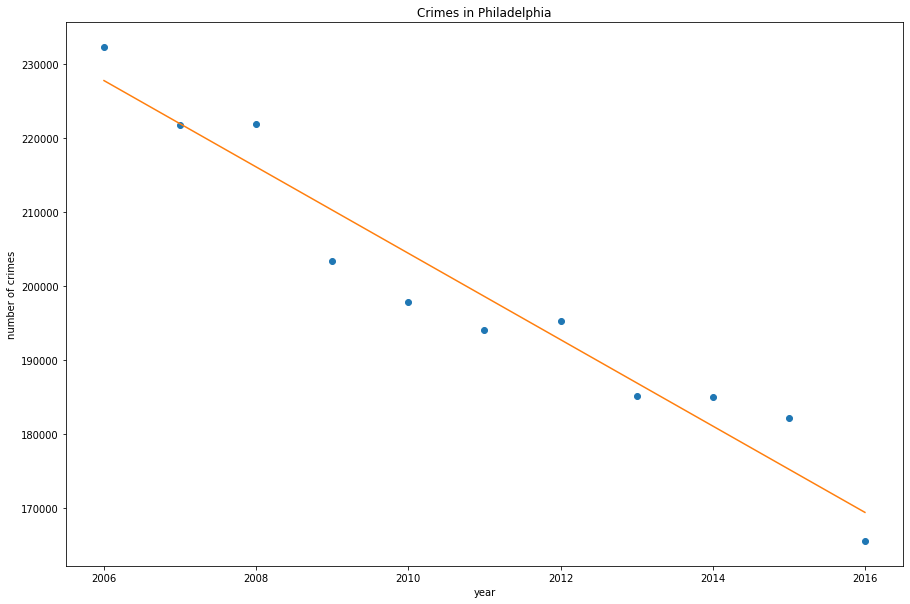

In [13]:
# regression line for the number of crimes per year.
table = count_by_year
x_d=table['Year'].values
y_d=table['Count'].values
z=np.polyfit(x=x_d,y=y_d,deg=1)
f=np.poly1d(z)
x_n = np.linspace(x_d.min(), x_d.max(), 100)
y_n = f(x_n)
plt.figure(figsize=(15,10))
plt.plot(x_d, y_d,'o',x_n,y_n)
    
plt.xlabel("year")
plt.ylabel("number of crimes")
plt.title("Crimes in Philadelphia")


In [14]:
#linear regression 1
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
count_year = count_by_year[['Year', 'Count']].sort_values(by=['Year'], ascending=True).reset_index(drop=True)
npMatrix = np.matrix(count_year)
x_value = npMatrix[:,0]
y_value = npMatrix[:,1]
line = LinearRegression().fit(x_value,y_value) 
m = line.coef_[0]
b_value = line.intercept_
print ("y = {0}x + {1}".format(m, b_value))
x_data = count_year['Year'].values
y_data = count_year ['Count'].values
minimum = x_data.min()
maximum = x_data.max()
result = sm.ols(formula="Count ~ Year", data=count_year).fit()
print (result.summary())

x1 = np.linspace(minimum, maximum, 100)
y1 = x1*m+b_value

y = [-5840.33636364]x + [11943470.15454546]
                            OLS Regression Results                            
Dep. Variable:                  Count   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sun, 15 Dec 2019   Prob (F-statistic):           1.09e-06
Time:                        09:59:41   Log-Likelihood:                -108.87
No. Observations:                  11   AIC:                             221.7
Df Residuals:                       9   BIC:                             222.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercep

In [15]:
#Based on the regression line equation, on average, crime count decreases by -5840.33636364 every year.

In [16]:
#now we add another factor to our regression(crime type)
data_by_type = df2.copy().groupby(df2['Crime_Type'], as_index=True, group_keys=True).count()
count_crime_type = data_by_type[['UCR_General']].reset_index()
count_crime_type = count_crime_type.rename(index=str, columns={'UCR_General' : 'Count'})
count_crime_type


Crime_Type   Count
0                Aggravated Assault Firearm   27208
1             Aggravated Assault No Firearm   67335
2                        All Other Offenses  428833
3                                     Arson    5543
4                  Burglary Non-Residential   22896
5                      Burglary Residential   93013
6               DRIVING UNDER THE INFLUENCE   51764
7                        Disorderly Conduct   39527
8                              Embezzlement    4546
9                Forgery and Counterfeiting    4760
10                                    Fraud  111027
11                      Gambling Violations     905
12                      Homicide - Criminal    3349
13              Homicide - Gross Negligence      12
14                   Homicide - Justifiable      40
15                    Liquor Law Violations    5363
16                      Motor Vehicle Theft   45587
17           Narcotic / Drug Law Violations  134460
18     Offenses Against Family and Children    1766
19                           Other Assaults  270525
20  Other Sex Offenses (Not Commercialized)   14989
21     Prostitution and Commercialized Vice   12640
22                       Public Drunkenness    4547
23                                     Rape   11551
24                Receiving Stolen Property     757
25           Recovered Stolen Motor Vehicle   92643
26                          Robbery Firearm   39428
27                       Robbery No Firearm   50455
28                       Theft from Vehicle  167027
29                                   Thefts  250111
30                       Vagrancy/Loitering    6726
31              Vandalism/Criminal Mischief  196318
32                        Weapon Violations   18440

In [18]:
#linear regression 2
#another regression based on Year and Crime Type
crime_type_year = df2.copy()

crime_type_year  = crime_type_year[['Year','Crime_Type']]
#Get the count associated with year and crime type
crime_type_year = crime_type_year.groupby(['Year','Crime_Type']).size()
crime_type_year = crime_type_year.reset_index()
#Rename count column
crime_type_year['Count'] = crime_type_year[0]
crime_type_year = crime_type_year.drop(0,1)
#Fit the second regression
regression2 = sm.ols(formula='Count ~ Year + Crime_Type + Year * Crime_Type', data=crime_type_year).fit()
regression2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     349.9
Date:                Sun, 15 Dec 2019   Prob (F-statistic):          1.12e-236
Time:                        10:07:19   Log-Likelihood:                -2903.9
No. Observations:                 349   AIC:                             5940.
Df Residuals:                     283   BIC:                             6194.
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                   1.837e+05   2.12e+05      0.868      0.386   -2.33e+05       6e+05
Crime_Type[T.Aggravated Assault No Firearm]                 1.728e+05   2.99e+05      0.577      0.564   -4.16e+05    7.62e+05
Crime_Type[T.All Other Offenses]                            1.706e+06   2.99e+05      5.698      0.000    1.12e+06    2.29e+06
Crime_Type[T.Arson]                                        -1.295e+05   2.99e+05     -0.433      0.665   -7.19e+05     4.6e+05
Crime_Type[T.Burglary Non-Residential]                      7.455e+04   2.99e+05      0.249      0.803   -5.15e+05    6.64e+05
Crime_Type[T.Burglary Residential]                          3.656e+05   2.99e+05      1.221      0.223   -2.24e+05    9.55e+05
Crime_Type[T.DRIVING UNDER THE INFLUENCE]                   1.828e+05   2.99e+05      0.611      0.542   -4.06e+05    7.72e+05
Crime_Type[T.Disorderly Conduct]                            2.849e+05   2.99e+05      0.952      0.342   -3.04e+05    8.74e+05
Crime_Type[T.Embezzlement]                                 -1.541e+05   2.99e+05     -0.515      0.607   -7.43e+05    4.35e+05
Crime_Type[T.Forgery and Counterfeiting]                   -6.806e+04   2.99e+05     -0.227      0.820   -6.57e+05    5.21e+05
Crime_Type[T.Fraud]                                        -5.714e+05   2.99e+05     -1.909      0.057   -1.16e+06    1.77e+04
Crime_Type[T.Gambling Violations]                          -1.583e+05   2.99e+05     -0.529      0.597   -7.47e+05    4.31e+05
Crime_Type[T.Homicide - Criminal]                          -1.613e+05   2.99e+05     -0.539      0.590    -7.5e+05    4.28e+05
Crime_Type[T.Homicide - Gross Negligence]                   -1.84e+05   3.67e+05     -0.501      0.617   -9.06e+05    5.38e+05
Crime_Type[T.Homicide - Justifiable]                       -1.917e+05   3.14e+06     -0.061      0.951   -6.37e+06    5.99e+06
Crime_Type[T.Liquor Law Violations]                          -8.8e+04   2.99e+05     -0.294      0.769   -6.77e+05    5.01e+05
Crime_Type[T.Motor Vehicle Theft]                           8.886e+05   2.99e+05      2.969      0.003    2.99e+05    1.48e+06
Crime_Type[T.Narcotic / Drug Law Violations]                1.392e+06   2.99e+05      4.652      0.000    8.03e+05    1.98e+06
Crime_Type[T.Offenses Against Family and Children]          -1.69e+05   2.99e+05     -0.565      0.573   -7.58e+05     4.2e+05
Crime_Type[T.Other Assaults]                                4.702e+05   2.99e+05      1.571      0.117   -1.19e+05    1.06e+06
Crime_Type[T.Other Sex Offenses (Not Commercialized)]      -2.625e+04   2.99e+05     -0.088      0.930   -6.15e+05    5.63e+05
Crime_Type[T.Prostitution and Comme

#### If we compare the regression results,the model that was besed on year and crime type has a higher p-value and R-squared compared with the model with only year. So, we conclude that crime type contributes in a meaningful way to the predictive ability of the regression equation.

# Conclusion

## References and Further Reading
- Dataset: https://www.kaggle.com/mchirico/philadelphiacrimedata
- 